<a href="https://colab.research.google.com/github/rinutresamj/Time_Series/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing dependencies

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df_test=pd.read_csv("/content/drive/MyDrive/IQGateway/test.csv")
dftrain=pd.read_csv("/content/drive/MyDrive/IQGateway/train.csv")
df=dftrain
dftrain

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deleting null values

In [3]:
dftrain.dropna(inplace=True)

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6376 non-null   float64
 1   date       6376 non-null   object 
 2   city       6376 non-null   object 
 3   lat        6376 non-null   float64
 4   long       6376 non-null   float64
 5   pop        6376 non-null   float64
 6   shop       6376 non-null   object 
 7   brand      6376 non-null   object 
 8   container  6376 non-null   object 
 9   capacity   6376 non-null   object 
 10  price      6376 non-null   float64
 11  quantity   6376 non-null   float64
dtypes: float64(6), object(6)
memory usage: 647.6+ KB


Copying the required columns to new dataframe

In [5]:
df__train=dftrain[['date','lat','long','pop','price','quantity']].copy()

In [6]:
df__train.head()

,date,lat,long,pop,price,quantity
0,31/01/12,37.97945,23.71622,672130.0,0.96,13280.0
1,31/01/12,37.97945,23.71622,672130.0,2.86,6727.0
2,31/01/12,37.97945,23.71622,672130.0,0.87,9848.0
3,31/01/12,37.97945,23.71622,672130.0,1.00,20050.0
4,31/01/12,37.97945,23.71622,672130.0,0.39,25696.0


In [7]:
df__train.set_index('date')

,lat,long,pop,price,quantity
date,,,,,
31/01/12,37.97945,23.71622,672130.0,0.96,13280.0
31/01/12,37.97945,23.71622,672130.0,2.86,6727.0
31/01/12,37.97945,23.71622,672130.0,0.87,9848.0
31/01/12,37.97945,23.71622,672130.0,1.00,20050.0
31/01/12,37.97945,23.71622,672130.0,0.39,25696.0
...,...,...,...,...,...
31/12/17,37.96245,23.68708,665871.0,1.02,33201.0
31/12/17,39.63689,22.41761,144302.0,0.47,46971.0
31/12/17,38.24444,21.73444,168501.0,1.02,47708.0


In [8]:
df_train=df__train.groupby(['date']).agg({"lat":"mean","long":"mean","pop":"mean","price":"mean","quantity":"mean"})

In [9]:
df_train

,lat,long,pop,price,quantity
date,,,,,
28/02/13,38.302710,23.266608,351452.561798,1.202921,17884.325843
28/02/14,38.299733,23.288875,357049.808989,1.202472,16831.662921
28/02/15,38.317681,23.260037,360465.488636,1.112386,18128.909091
28/02/17,38.302901,23.266935,352475.494382,1.231685,17269.977528
29/02/12,38.341010,23.240537,349690.643678,1.171839,18010.436782
...,...,...,...,...,...
31/12/13,38.337573,23.262646,356063.735632,1.135862,27515.390805
31/12/14,38.299118,23.271603,354940.833333,1.231111,26976.788889
31/12/15,38.284087,23.281199,357972.168539,1.152472,29250.617978


In [10]:
df_train.reset_index(inplace=True)

Timeseries forecasting using Facebook Prophet

In [12]:

df_train = df_train.rename(columns={'quantity': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] 
df_train['y'] = np.log(df_train['y'])


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      72 non-null     object 
 1   lat     72 non-null     float64
 2   long    72 non-null     float64
 3   pop     72 non-null     float64
 4   price   72 non-null     float64
 5   y       72 non-null     float64
 6   y_orig  72 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.1+ KB


In [14]:
model_new = Prophet() #instantiate Prophet
model_new.add_regressor('lat')
model_new.add_regressor('long')
model_new.add_regressor('pop')
model_new.add_regressor('price')

In [15]:
model_new.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe9nboai/i2fr5j4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe9nboai/ch71e215.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38115', 'data', 'file=/tmp/tmpfe9nboai/i2fr5j4k.json', 'init=/tmp/tmpfe9nboai/ch71e215.json', 'output', 'file=/tmp/tmpfe9nboai/prophet_modelm4hdehug/prophet_model-20221216055629.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:56:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Making future dataframe

In [16]:
future_data = model_new.make_future_dataframe(periods=72, freq = 'M')

In [17]:
future_data

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31
...,...
139,2023-08-31
140,2023-09-30
141,2023-10-31
142,2023-11-30


In [18]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [19]:
df_test

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


In [20]:
df_test.dropna(inplace=True)

In [21]:
df=df.append(df_test)

In [22]:
df.dropna(inplace=True)

In [23]:
df1=df[['date','lat','long','pop','price','quantity']].copy()

In [25]:
df2=df1.groupby(['date']).agg({"lat":"mean","long":"mean","pop":"mean","price":"mean","quantity":"mean"})

In [27]:
df2.reset_index(inplace=True)

In [28]:
df2

,date,lat,long,pop,price,quantity
0,28/02/13,38.302710,23.266608,351452.561798,1.202921,17884.325843
1,28/02/14,38.299733,23.288875,357049.808989,1.202472,16831.662921
2,28/02/15,38.317681,23.260037,360465.488636,1.112386,18128.909091
3,28/02/17,38.302901,23.266935,352475.494382,1.231685,17269.977528
4,28/02/18,38.332503,23.250572,357822.033708,1.318876,16550.022472
...,...,...,...,...,...,...
79,31/12/14,38.299118,23.271603,354940.833333,1.231111,26976.788889
80,31/12/15,38.284087,23.281199,357972.168539,1.152472,29250.617978
81,31/12/16,38.332503,23.250572,357360.426966,1.273258,27142.325843
82,31/12/17,38.302710,23.266608,352475.494382,1.256180,27647.842697


In [30]:
df2 = df2.rename(columns={'meantemp': 'y', 'date':'ds'})

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ds        84 non-null     object 
 1   lat       84 non-null     float64
 2   long      84 non-null     float64
 3   pop       84 non-null     float64
 4   price     84 non-null     float64
 5   quantity  84 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB


In [33]:
future_data=df2[['ds','lat','long','pop','price']]

In [34]:
future_data.head()

,ds,lat,long,pop,price
0,28/02/13,38.302710,23.266608,351452.561798,1.202921
1,28/02/14,38.299733,23.288875,357049.808989,1.202472
2,28/02/15,38.317681,23.260037,360465.488636,1.112386
3,28/02/17,38.302901,23.266935,352475.494382,1.231685
4,28/02/18,38.332503,23.250572,357822.033708,1.318876


In [35]:
future_data.shape

(84, 5)

Forecasting

In [36]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
79,2018-08-31,10.467548,10.440496,10.492422
80,2018-09-30,10.275963,10.248794,10.301558
81,2018-10-31,10.123562,10.096472,10.149501
82,2018-11-30,10.049413,10.023607,10.078136
83,2018-12-31,10.249371,10.222319,10.274671


In [37]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,price,price_lower,price_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,10.290068,9.952242,10.004128,10.290068,10.290068,-0.311850,-0.311850,-0.311850,0.009812,...,0.008626,0.008626,0.008626,-0.321663,-0.321663,-0.321663,0.0,0.0,0.0,9.978218
1,2012-02-29,10.289621,9.780694,9.833507,10.289621,10.289621,-0.482796,-0.482796,-0.482796,0.008471,...,0.006772,0.006772,0.006772,-0.491266,-0.491266,-0.491266,0.0,0.0,0.0,9.806826
2,2012-03-31,10.289144,10.162861,10.214103,10.289144,10.289144,-0.100576,-0.100576,-0.100576,0.007264,...,0.015132,0.015132,0.015132,-0.107840,-0.107840,-0.107840,0.0,0.0,0.0,10.188568
3,2012-04-30,10.288682,10.333098,10.387385,10.288682,10.288682,0.071918,0.071918,0.071918,0.015486,...,0.015129,0.015129,0.015129,0.056431,0.056431,0.056431,0.0,0.0,0.0,10.360599
4,2012-05-31,10.288204,10.449664,10.502471,10.288204,10.288204,0.187827,0.187827,0.187827,0.011126,...,0.010978,0.010978,0.010978,0.176701,0.176701,0.176701,0.0,0.0,0.0,10.476031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2018-08-31,10.262901,10.440496,10.492422,10.260585,10.264925,0.204647,0.204647,0.204647,-0.010889,...,-0.011474,-0.011474,-0.011474,0.215536,0.215536,0.215536,0.0,0.0,0.0,10.467548
80,2018-09-30,10.263154,10.248794,10.301558,10.260403,10.265628,0.012808,0.012808,0.012808,-0.038453,...,-0.038657,-0.038657,-0.038657,0.051262,0.051262,0.051262,0.0,0.0,0.0,10.275963
81,2018-10-31,10.263416,10.096472,10.149501,10.260183,10.266268,-0.139854,-0.139854,-0.139854,-0.026293,...,-0.026497,-0.026497,-0.026497,-0.113560,-0.113560,-0.113560,0.0,0.0,0.0,10.123562
82,2018-11-30,10.263670,10.023607,10.078136,10.259887,10.266970,-0.214257,-0.214257,-0.214257,-0.024349,...,-0.016412,-0.016412,-0.016412,-0.189908,-0.189908,-0.189908,0.0,0.0,0.0,10.049413


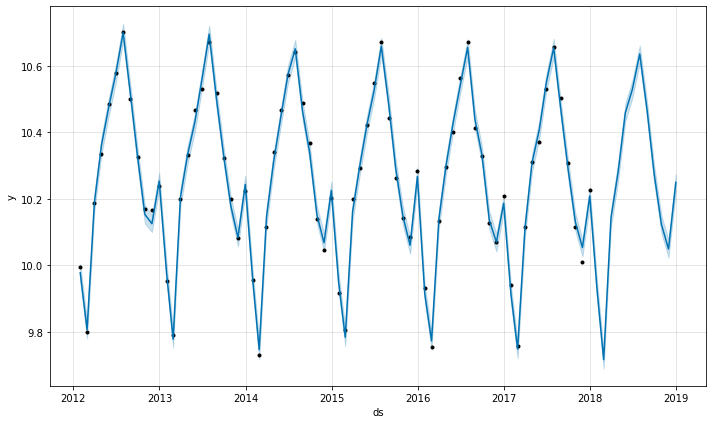

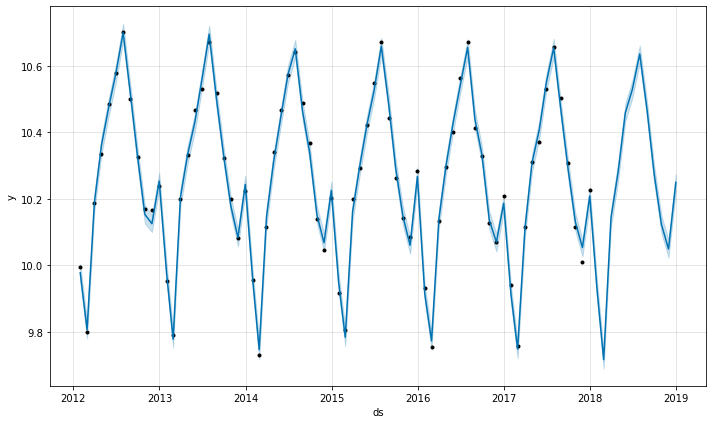

In [38]:

model_new.plot(forecast_data)

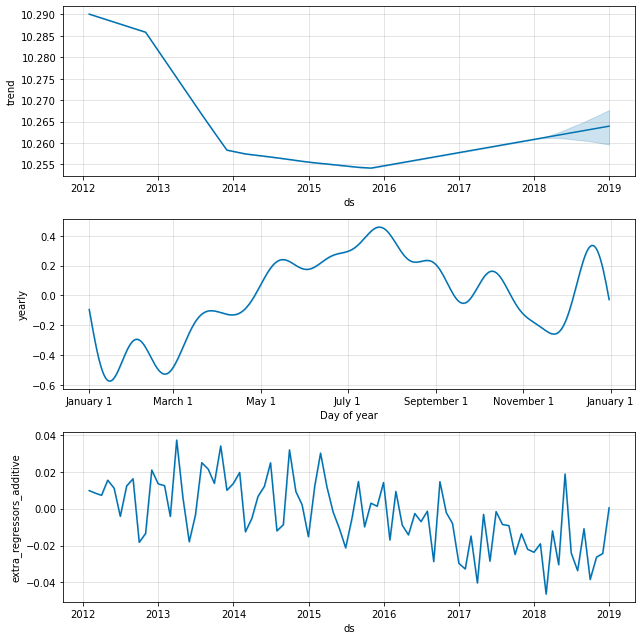

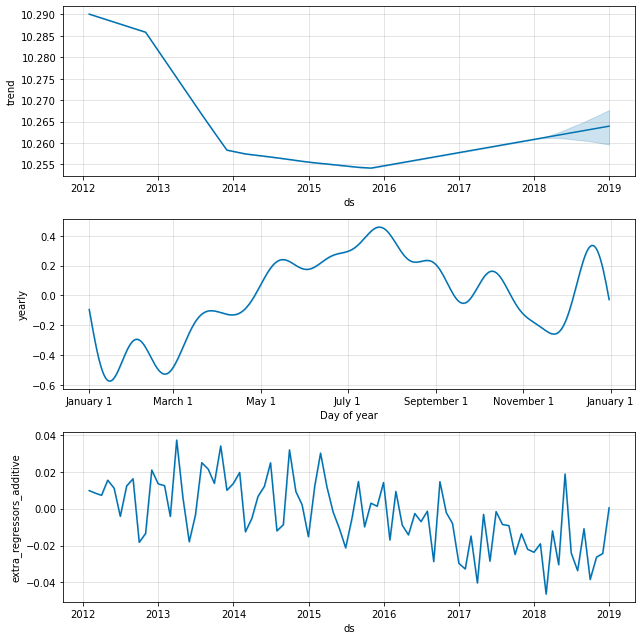

In [39]:


model_new.plot_components(forecast_data)

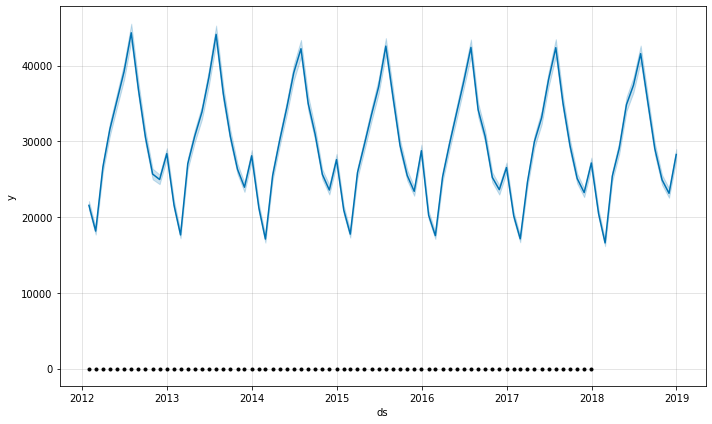

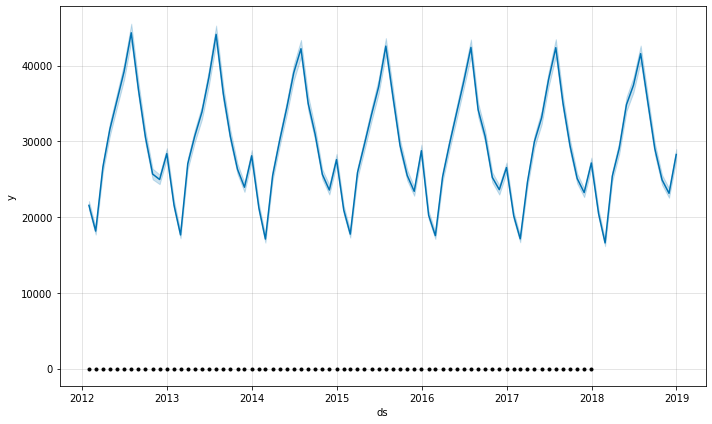

In [40]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)
     

In [41]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [42]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])
     

'temp-plot.html'

Cross validation

In [52]:
from prophet.diagnostics import cross_validation,performance_metrics
cv=cross_validation(model=model_new,horizon=30)
df_p=performance_metrics(cv)
df_p

INFO:prophet:Making 60 forecasts with cutoffs between 2013-01-30 23:59:59.999999970 and 2017-12-30 23:59:59.999999970


  0%|          | 0/60 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe9nboai/amx_94og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe9nboai/oby8vvvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4485', 'data', 'file=/tmp/tmpfe9nboai/amx_94og.json', 'init=/tmp/tmpfe9nboai/oby8vvvs.json', 'output', 'file=/tmp/tmpfe9nboai/prophet_modelawcjr0lo/prophet_model-20221216062343.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:23:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe9nboai/w6faptnh.json
DEBUG:cmdstanpy:input tempfile: 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 00:00:00.000000030,501.360762,22.391087,5.784131,0.562495,0.008604,0.180588,0.2
